In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

1.Прочитайте базу my_PJME_MW.csv и сделайте ее перрасчет (ресемплинг) в представление по 1 месяцу.

In [2]:
Path_Energy = './Data/my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])

data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [3]:
data_m = data.resample('M').mean()

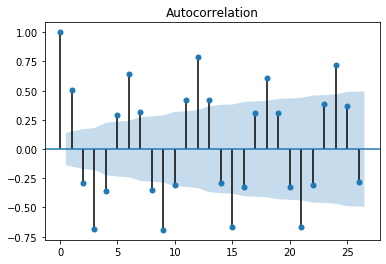

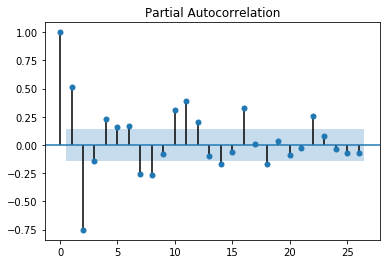

In [4]:
sm.graphics.tsa.plot_acf(data_m['PJME_MW'].values, lags=26)
plt.show()
sm.graphics.tsa.plot_pacf(data_m['PJME_MW'].values, lags=26)
plt.show()

2.Подберите параметры модели SARIMAX для этого ряда.

In [20]:
import itertools

# Определим p, d и q в диапазоне 0-3
p = d = q = range(0, 3)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))
# зададим сезонность p, q и q
seasonal_pdq = [(x[0], x[1], x[2], 3) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 3)
SARIMAX: (0, 0, 1) x (0, 0, 2, 3)
SARIMAX: (0, 0, 2) x (0, 1, 0, 3)
SARIMAX: (0, 0, 2) x (0, 1, 1, 3)


In [21]:
best_param = {'AIC':float('inf'),'PARAM':''}
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-30],order=param,
                                    seasonal_order=param_seasonal ,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

            results = mod.fit()
            print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            if best_param['AIC'] > results.aic:
                best_param['AIC'] = results.aic
                best_param['PARAM'] = 'SARIMAX: {} x {} - AIC:{}'.format(param, param_seasonal, results.aic)
        except:
            continue
print(f"\nBest param: {best_param['PARAM']}")            

SARIMA(0, 0, 0)x(0, 0, 0, 3) - AIC:3992.5110075928433
SARIMA(0, 0, 0)x(0, 0, 1, 3) - AIC:3829.98800309148
SARIMA(0, 0, 0)x(0, 0, 2, 3) - AIC:3716.9463289940472
SARIMA(0, 0, 0)x(0, 1, 0, 3) - AIC:3386.226848111379
SARIMA(0, 0, 0)x(0, 1, 1, 3) - AIC:3237.0808715815556
SARIMA(0, 0, 0)x(0, 1, 2, 3) - AIC:3038.497439422915
SARIMA(0, 0, 0)x(0, 2, 0, 3) - AIC:3544.171212807696
SARIMA(0, 0, 0)x(0, 2, 1, 3) - AIC:3364.3671075146085
SARIMA(0, 0, 0)x(0, 2, 2, 3) - AIC:3279.4528452348736
SARIMA(0, 0, 0)x(1, 0, 0, 3) - AIC:3406.197375566978
SARIMA(0, 0, 0)x(1, 0, 1, 3) - AIC:3315.1431254533004
SARIMA(0, 0, 0)x(1, 0, 2, 3) - AIC:3217.9360190718567
SARIMA(0, 0, 0)x(1, 1, 0, 3) - AIC:3065.121034944215
SARIMA(0, 0, 0)x(1, 1, 1, 3) - AIC:3015.296864698781
SARIMA(0, 0, 0)x(1, 1, 2, 3) - AIC:2915.1374706200836
SARIMA(0, 0, 0)x(1, 2, 0, 3) - AIC:3109.900152046942
SARIMA(0, 0, 0)x(1, 2, 1, 3) - AIC:3089.1552518666804
SARIMA(0, 0, 0)x(1, 2, 2, 3) - AIC:2961.8914846286025
SARIMA(0, 0, 0)x(2, 0, 0, 3) - AIC:30

SARIMA(0, 1, 2)x(2, 0, 1, 3) - AIC:2887.4557947245557
SARIMA(0, 1, 2)x(2, 0, 2, 3) - AIC:2939.699085643634
SARIMA(0, 1, 2)x(2, 1, 0, 3) - AIC:2949.3851159010023
SARIMA(0, 1, 2)x(2, 1, 1, 3) - AIC:2915.7266506360943
SARIMA(0, 1, 2)x(2, 1, 2, 3) - AIC:2860.8447638877346
SARIMA(0, 1, 2)x(2, 2, 0, 3) - AIC:2984.2670215931757
SARIMA(0, 1, 2)x(2, 2, 1, 3) - AIC:2995.1866055461123
SARIMA(0, 1, 2)x(2, 2, 2, 3) - AIC:3214.040742615381
SARIMA(0, 2, 0)x(0, 0, 0, 3) - AIC:3250.6050318988573
SARIMA(0, 2, 0)x(0, 0, 1, 3) - AIC:3164.1217880638587
SARIMA(0, 2, 0)x(0, 0, 2, 3) - AIC:3085.498998340986
SARIMA(0, 2, 0)x(0, 1, 0, 3) - AIC:3380.600655482677
SARIMA(0, 2, 0)x(0, 1, 1, 3) - AIC:3171.5893700885126
SARIMA(0, 2, 0)x(0, 1, 2, 3) - AIC:3078.119491993545
SARIMA(0, 2, 0)x(0, 2, 0, 3) - AIC:3530.4558632367825
SARIMA(0, 2, 0)x(0, 2, 1, 3) - AIC:3345.8596841287253
SARIMA(0, 2, 0)x(0, 2, 2, 3) - AIC:3259.8949385130036
SARIMA(0, 2, 0)x(1, 0, 0, 3) - AIC:3151.320111710682
SARIMA(0, 2, 0)x(1, 0, 1, 3) - AIC

SARIMA(1, 0, 2)x(1, 0, 2, 3) - AIC:2964.3809231663927
SARIMA(1, 0, 2)x(1, 1, 0, 3) - AIC:2979.678878354255
SARIMA(1, 0, 2)x(1, 1, 1, 3) - AIC:2927.845773774307
SARIMA(1, 0, 2)x(1, 1, 2, 3) - AIC:2841.382351004625
SARIMA(1, 0, 2)x(1, 2, 0, 3) - AIC:3291.638219008689
SARIMA(1, 0, 2)x(1, 2, 1, 3) - AIC:3009.541959389445
SARIMA(1, 0, 2)x(1, 2, 2, 3) - AIC:3180.6243597833627
SARIMA(1, 0, 2)x(2, 0, 0, 3) - AIC:2981.5265767105193
SARIMA(1, 0, 2)x(2, 0, 1, 3) - AIC:3010.373143376611
SARIMA(1, 0, 2)x(2, 0, 2, 3) - AIC:2971.81638464001
SARIMA(1, 0, 2)x(2, 1, 0, 3) - AIC:2912.5882099192677
SARIMA(1, 0, 2)x(2, 1, 1, 3) - AIC:2888.891472875135
SARIMA(1, 0, 2)x(2, 1, 2, 3) - AIC:3037.4649162365185
SARIMA(1, 0, 2)x(2, 2, 0, 3) - AIC:3025.6799742704075
SARIMA(1, 0, 2)x(2, 2, 1, 3) - AIC:2906.2024013456985
SARIMA(1, 0, 2)x(2, 2, 2, 3) - AIC:3191.349379313321
SARIMA(1, 1, 0)x(0, 0, 0, 3) - AIC:3201.113014407609
SARIMA(1, 1, 0)x(0, 0, 1, 3) - AIC:3097.3229083897413
SARIMA(1, 1, 0)x(0, 0, 2, 3) - AIC:3006

SARIMA(1, 2, 2)x(0, 1, 1, 3) - AIC:3145.3969620227836
SARIMA(1, 2, 2)x(0, 1, 2, 3) - AIC:2968.9420171053316
SARIMA(1, 2, 2)x(0, 2, 0, 3) - AIC:3429.827124152061
SARIMA(1, 2, 2)x(0, 2, 1, 3) - AIC:3292.1713891138634
SARIMA(1, 2, 2)x(0, 2, 2, 3) - AIC:3009.401959070282
SARIMA(1, 2, 2)x(1, 0, 0, 3) - AIC:3007.383906395822
SARIMA(1, 2, 2)x(1, 0, 1, 3) - AIC:2944.9284143775676
SARIMA(1, 2, 2)x(1, 0, 2, 3) - AIC:2890.6693537102487
SARIMA(1, 2, 2)x(1, 1, 0, 3) - AIC:3156.8908478846715
SARIMA(1, 2, 2)x(1, 1, 1, 3) - AIC:3116.7837521759548
SARIMA(1, 2, 2)x(1, 1, 2, 3) - AIC:3055.6225065589706
SARIMA(1, 2, 2)x(1, 2, 0, 3) - AIC:3307.001211882778
SARIMA(1, 2, 2)x(1, 2, 1, 3) - AIC:3222.1658929991454
SARIMA(1, 2, 2)x(1, 2, 2, 3) - AIC:3153.1538764793613
SARIMA(1, 2, 2)x(2, 0, 0, 3) - AIC:2951.6940558980027
SARIMA(1, 2, 2)x(2, 0, 1, 3) - AIC:2927.358101210089
SARIMA(1, 2, 2)x(2, 0, 2, 3) - AIC:2891.380823577797
SARIMA(1, 2, 2)x(2, 1, 0, 3) - AIC:3099.847556223537
SARIMA(1, 2, 2)x(2, 1, 1, 3) - AIC:

SARIMA(2, 1, 1)x(2, 1, 2, 3) - AIC:2860.6471862284807
SARIMA(2, 1, 1)x(2, 2, 0, 3) - AIC:2941.931329409291
SARIMA(2, 1, 1)x(2, 2, 1, 3) - AIC:2907.1342895001317
SARIMA(2, 1, 1)x(2, 2, 2, 3) - AIC:2894.472535642535
SARIMA(2, 1, 2)x(0, 0, 0, 3) - AIC:3001.296552547408
SARIMA(2, 1, 2)x(0, 0, 1, 3) - AIC:2921.38882948882
SARIMA(2, 1, 2)x(0, 0, 2, 3) - AIC:2861.6905320345604
SARIMA(2, 1, 2)x(0, 1, 0, 3) - AIC:3079.8102549169353
SARIMA(2, 1, 2)x(0, 1, 1, 3) - AIC:2997.2435330746885
SARIMA(2, 1, 2)x(0, 1, 2, 3) - AIC:2940.32639260862
SARIMA(2, 1, 2)x(0, 2, 0, 3) - AIC:3132.05644976839
SARIMA(2, 1, 2)x(0, 2, 1, 3) - AIC:3128.868250182918
SARIMA(2, 1, 2)x(0, 2, 2, 3) - AIC:3059.852489873076
SARIMA(2, 1, 2)x(1, 0, 0, 3) - AIC:2937.371797476939
SARIMA(2, 1, 2)x(1, 0, 1, 3) - AIC:2901.713875993622
SARIMA(2, 1, 2)x(1, 0, 2, 3) - AIC:2845.5886035758754
SARIMA(2, 1, 2)x(1, 1, 0, 3) - AIC:3023.880954985015
SARIMA(2, 1, 2)x(1, 1, 1, 3) - AIC:2945.9641959523487
SARIMA(2, 1, 2)x(1, 1, 2, 3) - AIC:2934.89

Лучшие результаты на месячных данных параметры модели ARIMA(0, 1, 2)x(1, 0, 2, 3) - AIC:2825.0356302432674
 (для p,q,d,ps,ds,qs из диапазона [0,1,2]).

In [22]:
mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-30],order=[0,1,2],
                                seasonal_order=[1,0,2,3] ,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_opt = mod.fit()
print('AIC:{}',results_opt.aic)

AIC:{} 2825.0356302432674


In [23]:
print(results_opt.summary().tables[0],results_opt.summary().tables[1])

                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                  170
Model:             SARIMAX(0, 1, 2)x(1, 0, 2, 3)   Log Likelihood               -1406.518
Date:                           Sat, 25 Jan 2020   AIC                           2825.036
Time:                                   23:29:34   BIC                           2843.487
Sample:                                        0   HQIC                          2832.528
                                           - 170                                         
Covariance Type:                             opg                                         
========================================================================================= ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------

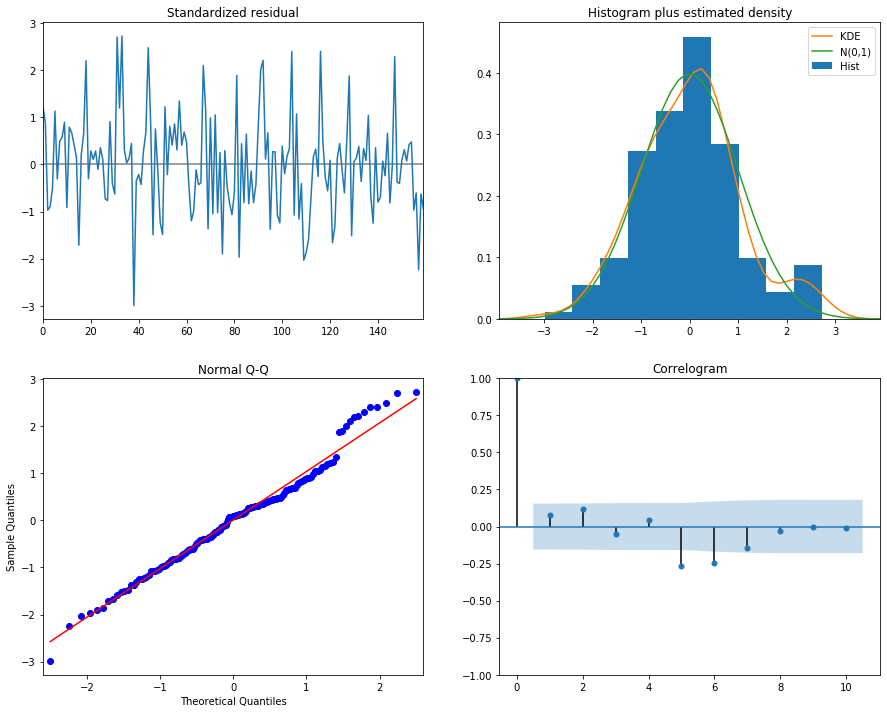

In [24]:
results_opt.plot_diagnostics(figsize=(15, 12))
plt.show()

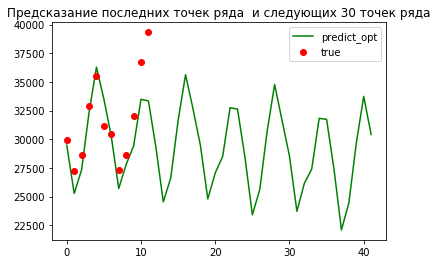

In [19]:
pred_dynamic_opt = results_opt.forecast(42)

plt.plot(pred_dynamic_opt,'g', label='predict_opt' )
#Отобразим истинный значения 
plt.plot(data_m['PJME_MW'].values[-12:],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 30 точек ряда')
plt.legend()

plt.show()

3.Сделайте вывод о том, как изменилась модель по сравнению с недельной.

Тут у меня есть трудности с интерпретацией модели.
По сравнению с недельной, ошибка AIC уменьшилась в несколько раз (пробовал расчитать с сезонностью 12 месяцев, это позволяет получить ошибку еще меньше, но не значительно, а время расчёта существенно возрастает). По графику нормальности получилось также добиться лучших результатов, они почти совпадают. График корреляции ошибок похож на случайный.